# Download Data From Kaggle API :
1- Sign In your Kaggle Account

2-Click on Profile Icon and then Click on Settings

3- Click on Create New Token then the kaggle.json file will be downloaded in your Local Sysytem

4- Upload the Kaggel.json file in Your Present Working Dricetry then perform these commands:-



## For Making the Hidden Folder name: .kaggle in Present Working Directry

In [ ]:
!mkdir -p ~/ .kaggle

## For Copying kaggle.json file into the Folder .kaggle

In [ ]:
!cp /content/kaggle.json /content/.kaggle/

### For Specify the location of the kaggle.json file using the KAGGLE_CONFIG_DIR environment variable. Here's how you can do it:

In [ ]:
import os

# Set the KAGGLE_CONFIG_DIR environment variable
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

## For Giving The permission to the Directory to allow only the owner to read and write the file, while denying access to others.

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

## For Downloading the Data : dogs-vs-cats

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:11<00:00, 189MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s]


## For Unzipping the downloaded Folder

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Image Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
# Internally it is using genrator concept

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
for i in train_ds:
  print(i)

Streaming output truncated to the last 5000 lines.
         [210.98633  , 202.98633  , 191.98633  ]],

        [[166.07855  , 140.2686   , 120.245926 ],
         [174.78883  , 152.0328   , 134.3082   ],
         [181.96977  , 164.45415  , 150.67485  ],
         ...,
         [212.35835  , 204.35835  , 193.35835  ],
         [212.       , 204.       , 193.       ],
         [211.84825  , 203.84825  , 192.84825  ]],

        ...,

        [[198.68309  , 187.68309  , 181.68309  ],
         [189.71188  , 178.71188  , 172.71188  ],
         [192.9427   , 181.9427   , 175.9427   ],
         ...,
         [172.83398  , 163.83398  , 154.83398  ],
         [172.71077  , 163.71077  , 154.71077  ],
         [173.43028  , 164.43028  , 155.43028  ]],

        [[191.08273  , 180.08273  , 174.08273  ],
         [191.48575  , 180.48575  , 174.48575  ],
         [201.04782  , 190.04782  , 184.04782  ],
         ...,
         [172.09961  , 163.09961  , 154.09961  ],
         [171.35742  , 162.35742  , 1

In [ ]:
# If I want to Fast Process Perform Unit Scaling

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model =  Sequential()

In [ ]:
# First Convolution Layer
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

# Second Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Third Convolution Layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Fourth Convolution Layer
model.add(Conv2D(256,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Convert data into 1-D Array
model.add(Flatten())

# Adding First Hidden Layer with 128 Neurons and relu Activation Function
model.add(Dense(128,activation='relu'))

# Adding Second Hidden Layer with 64 Neurons and relu Activation Function
model.add(Dense(64,activation='relu'))

# Here We Have 1 Output Since it is Binary Classifiction
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 76s 98ms/step - loss: 0.6539 - accuracy: 0.6061 - val_loss: 0.6241 - val_accuracy: 0.6410


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dog_image = plt.imread("/content/Dog.png")

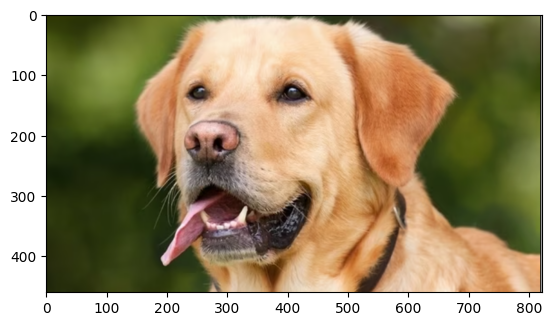

In [ ]:
plt.imshow(dog_image)

In [ ]:
dog_image.shape

(460, 822, 3)

In [ ]:
cat_image = plt.imread("/content/Cat.png")

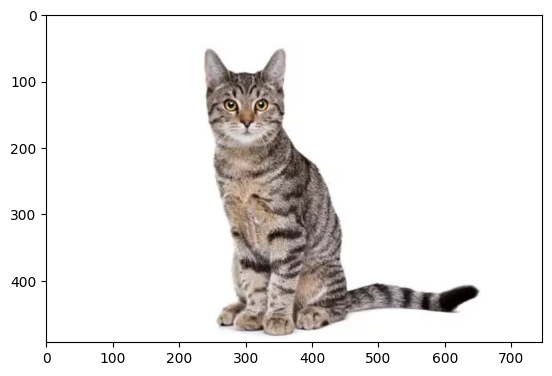

In [ ]:
plt.imshow(cat_image)

# Resize Both Images

In [ ]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [ ]:
dog_resize.shape

(256, 256, 3)

In [ ]:
cat_resize.shape

(256, 256, 3)

In [ ]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [ ]:
dog_resize.shape

(1, 256, 256, 3)

In [ ]:
cat_resize=cat_resize.reshape((1,256,256,3))

# Prediction:

## Cat=0


## Dog=1



In [ ]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 306ms/step


In [ ]:
pred

array([[0.72108984]], dtype=float32)

In [ ]:
model.predict(cat_resize)

1/1 [==============================] - 0s 22ms/step


array([[0.7480191]], dtype=float32)

In [ ]:
import numpy as np

predictions = np.argmax(pred)

In [ ]:
predictions

0

In [ ]:
if predictions==0:
  print("This is a Image of Cat")

else:
  print("This is a Image of Dog")

This is a Image of Cat


Wrong Prediction Because the image We Want to Predict it's a Dog's Image